# 수업 순서
1. iris데이터 확인(타입(Bunch), DESCR, feature_names, feature, target_names, target)
2. 꽃받침(Sepal) 길이와 넓이만 사용하여 데이터 분류(이유:그래프그리면서 알아보기위해)
3. 꽃잎(petal) 길이와 넓이로 실습주기
4. 전부 이용하여 seaborn으로 시각화 후 학습

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris

AttributeError: module 'numpy' has no attribute '__config__'

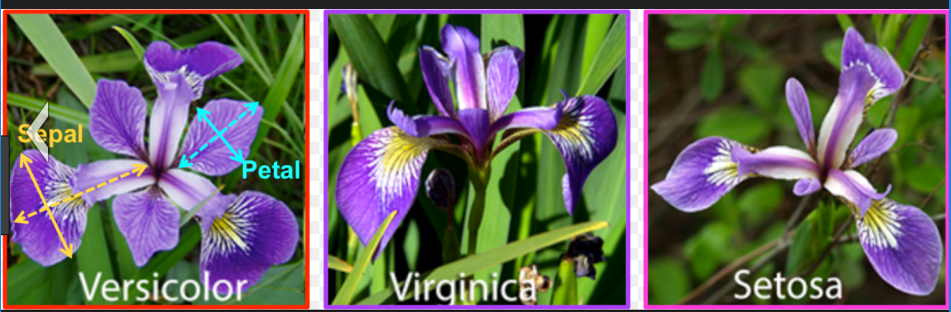

In [8]:
iris = load_iris()
print(type(iris))
"""
iris.DESCR
iris.feature_names
iris.data
iris.target_names
iris.target
"""

NameError: name 'load_iris' is not defined

In [ ]:
iris.keys()
# data or x = 문제, target or y = 정답

In [ ]:
iris.data #iris["data"]

In [ ]:
iris.target

In [ ]:
# iris.feature_names
iris.target_names

In [7]:
"""X, y데이터 넣기"""
X, y = iris.data, iris.target

In [ ]:
X[:3], y[:3]

In [8]:
"""y결과 데이터 개수 확인"""
np.bincount(iris.target)

array([50, 50, 50], dtype=int64)

# 꽃받침(Sepal) 데이터만 활용하여 분석

In [12]:
X2 = X[:,:2]

In [13]:
from sklearn.model_selection import train_test_split
# 외우기

In [23]:
X_train, X_test, y_train, y_test = \
    train_test_split(X2, #문제
                     y, #답
                     random_state=3, #랜덤으로 나누되 항상 똑같이 나눠짐 
                     test_size=0.2, #test 데이터가 20%
                     stratify=y) #
"""random_state, test_size, stratify 순서로 설명"""

'random_state, test_size, stratify 순서로 설명'

In [24]:
np.bincount(y_train), np.bincount(y_test)

(array([40, 40, 40], dtype=int64), array([10, 10, 10], dtype=int64))

Text(0, 0.5, 'Sepal width')

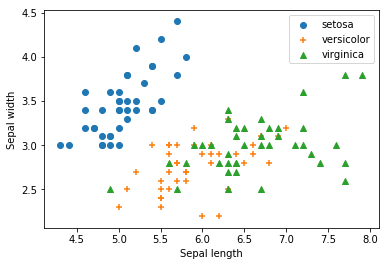

In [25]:
"""데이터 시각화"""
markers = ['o','+','^']
for i in range(3):
    xs = X_train[:,0][y_train==i]
    ys = X_train[:,1][y_train==i]
    plt.scatter(xs,ys,marker=markers[i])
plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
print("훈련 점수 : {}".format(model.score(X_train, y_train)))
print("테스트 점수 : {}".format(model.score(X_test, y_test)))

훈련 점수 : 0.8583333333333333
테스트 점수 : 0.7


## 점수가 낮으니 setosa와 setosa가 아닌걸로 이진 분류

In [31]:
y2 = y.copy()
y2[y2==2] = 1

In [32]:
X_train, X_test, y_train, y_test = \
    train_test_split(X2, y2, random_state=3, test_size=0.2, stratify=y)

Text(0, 0.5, 'Sepal width')

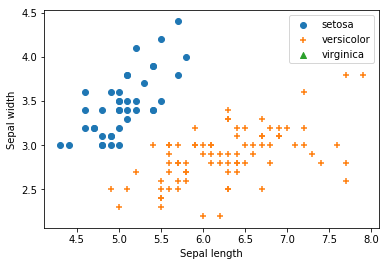

In [33]:
"""데이터 시각화"""
markers = ['o','+','^']
for i in range(3):
    xs = X_train[:,0][y_train==i]
    ys = X_train[:,1][y_train==i]
    plt.scatter(xs,ys,marker=markers[i])
plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [34]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print("훈련 점수 : {}".format(model.score(X_train, y_train)))
print("테스트 점수 : {}".format(model.score(X_test, y_test)))

훈련 점수 : 1.0
테스트 점수 : 0.9666666666666667


# 실습(꽃잎으로 분류 모델 만들기)

In [39]:
X3 = X[:, 2:]

In [42]:
X_train, X_test, y_train, y_test = ?

In [43]:
model = ?
model.fit(?, ?)
print("훈련 점수 : {}".format(?))
print("테스트 점수 : {}".format(?))

훈련 점수 : 1.0
테스트 점수 : 1.0


# 모든속성을 이용하여 데이터 분류

In [50]:
X_train, X_test, y_train, y_test = ?

((120, 4), (30, 4), (120,), (30,))

In [51]:
model = ?
?
print("훈련 점수 : {}".format(?))
print("테스트 점수 : {}".format(?))

훈련 점수 : 0.975
테스트 점수 : 0.9333333333333333


In [53]:
"""seaborn을 이용하여 시각화 하기위해 DataFrame을 이용"""
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df["label"] = y
iris_df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [54]:
import seaborn as sns

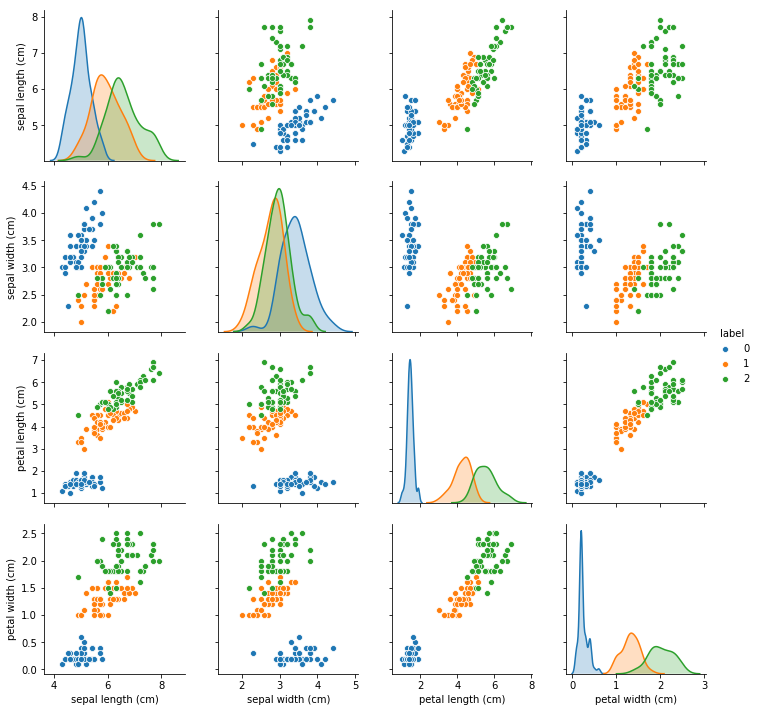

In [56]:
sns.pairplot(iris_df, hue='label', vars=iris.feature_names)

In [59]:
"""DataFrame에서 데이터 분석"""
X = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1]

In [61]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=3, test_size=0.2, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [62]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print("훈련 점수 : {}".format(model.score(X_train, y_train)))
print("테스트 점수 : {}".format(model.score(X_test, y_test)))

훈련 점수 : 0.975
테스트 점수 : 0.9333333333333333
